0 time   2021-05-01 00:59:00
Name: 0, dtype: datetime64[ns] <class 'pandas._libs.tslibs.timestamps.Timestamp'>
1 time   2021-05-01 00:59:00
Name: 1, dtype: datetime64[ns] <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2 time   2021-05-01 00:59:00
Name: 2, dtype: datetime64[ns] <class 'pandas._libs.tslibs.timestamps.Timestamp'>
3 time   2021-05-01 00:59:00
Name: 3, dtype: datetime64[ns] <class 'pandas._libs.tslibs.timestamps.Timestamp'>
4 time   2021-05-01 00:59:00
Name: 4, dtype: datetime64[ns] <class 'pandas._libs.tslibs.timestamps.Timestamp'>
5 time   2021-05-01 00:59:00
Name: 5, dtype: datetime64[ns] <class 'pandas._libs.tslibs.timestamps.Timestamp'>
6 time   2021-05-01 00:59:00
Name: 6, dtype: datetime64[ns] <class 'pandas._libs.tslibs.timestamps.Timestamp'>
7 time   2021-05-01 00:59:00
Name: 7, dtype: datetime64[ns] <class 'pandas._libs.tslibs.timestamps.Timestamp'>
8 time   2021-05-01 00:59:00
Name: 8, dtype: datetime64[ns] <class 'pandas._libs.tslibs.timestamps.Timestamp'>
9

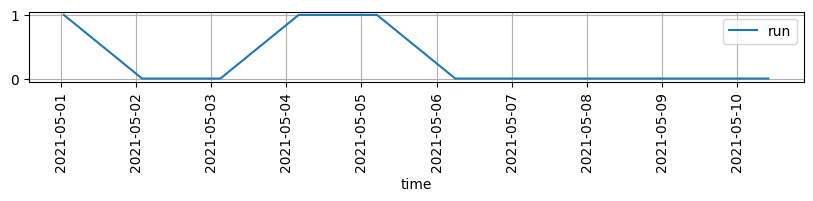

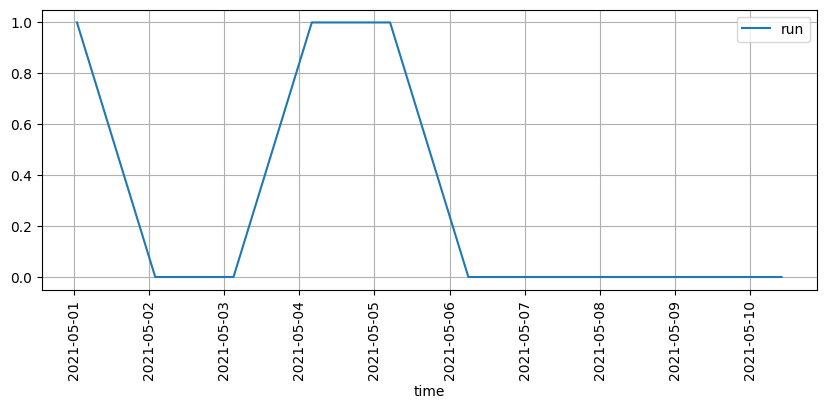

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta 

df = pd.read_csv("/kaggle/input/adp-realdataset/mtcars.csv")

# print(df.head())
# df.info()
# print(df.describe())

def minmax(data):
    if data > 0 :
        return 1
    else:
        return 0
    
    

ss  = '21.05.01 00:59:00'
# ss = '20'+ss
# ss = str.replace(ss,".","-")
df = pd.DataFrame()
# df["time"] = [ss]
# df["s"] = pd.to_datetime(df["time"])
# print(df["s"])

mylist = []
for i in range(10):
    mylist.append(ss)

df["time"] = mylist

df["time"] = '20' + df["time"]

df["time"] = df["time"].str.replace(".","-")
# print(df.info())
df["time"] = pd.to_datetime(df["time"])

for index, row in df.iterrows():
    print(index, row, type(row["time"]))
    row["time"] = row["time"] + timedelta(days=index,hours=index)
    df.loc[index,"time"] = row["time"]
    

a = np.random.randn(10)
df["run"] = a
# print(a)
for c in df.columns:
    if c != "time":
        df[c] = df[c].map(minmax)

# print(df.info())
print(df.head(10))

df = df.set_index("time")
print(df.info())

# fig, ax = plt.subplots()
plt.figure(figsize=(10,2))
plt.subplot(2, 1, 1) 
plt.grid()
plt.xticks(rotation=90)
# df.plot()
sns.lineplot(data=df)
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 2) 
plt.xticks(rotation=90)
plt.grid()
# df.plot()
sns.lineplot(data=df)
# sns.lineplot(data=df["run"], x = df["time"])
# plt.grid()
# sns.boxenplot(data=df)

plt.show()


DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')


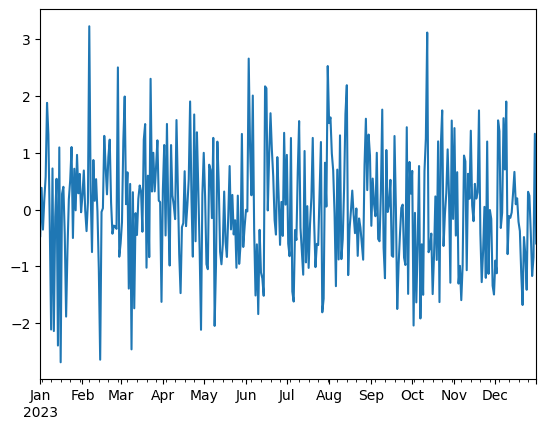

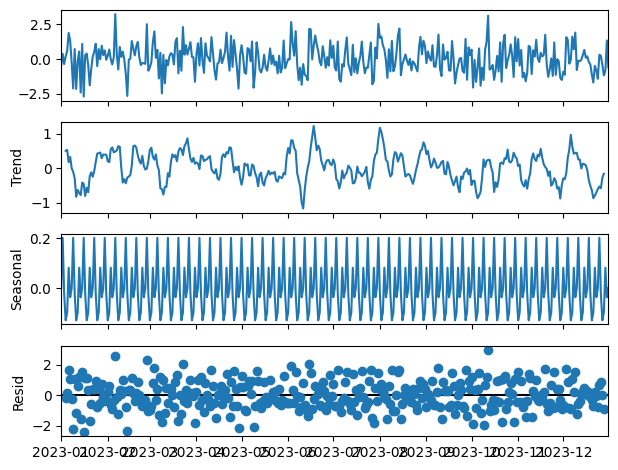

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -528.278
Date:                Sat, 24 Feb 2024   AIC                           1062.555
Time:                        07:07:31   BIC                           1074.247
Sample:                    01-01-2023   HQIC                          1067.202
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0618      0.056      1.106      0.269      -0.048       0.171
ma.L1         -0.9989      0.065    -15.268      0.000      -1.127      -0.871
sigma2         1.0512      0.109      9.649      0.0

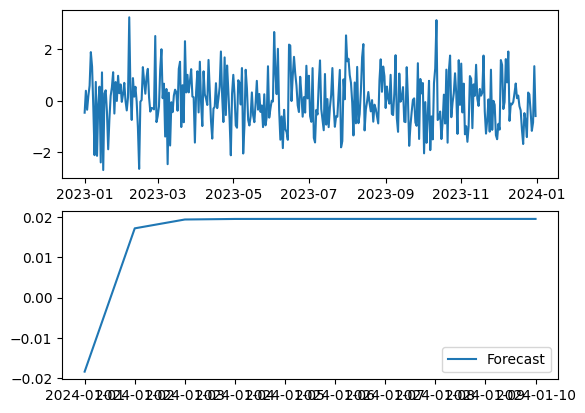

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 예제 데이터 생성
date_range = pd.date_range(start='2023-01-01', end='2023-12-31')

print(date_range)

data = np.random.randn(len(date_range))
ts = pd.Series(data, index=date_range)

# 시계열 데이터 시각화
ts.plot()
plt.show()

# 시계열 분해 (Trend, Seasonality, Residual)
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
fig = decomposition.plot()
plt.show()

# ARIMA 모델 적합
model = sm.tsa.ARIMA(ts, order=(1,1,1))  # ARIMA(p,d,q)로 필요에 따라 파라미터 설정
results = model.fit()
print(results.summary())

# 예측값 계산
forecast = results.predict(start='2024-01-01', end='2024-01-10', dynamic=False)

# 예측 결과 시각화
plt.subplot(2,1,1)
plt.plot(ts.index, ts, label='Original')
plt.subplot(2,1,2)
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend()
plt.show()

ShapiroResult(statistic=0.9903053641319275, pvalue=0.6892845630645752)


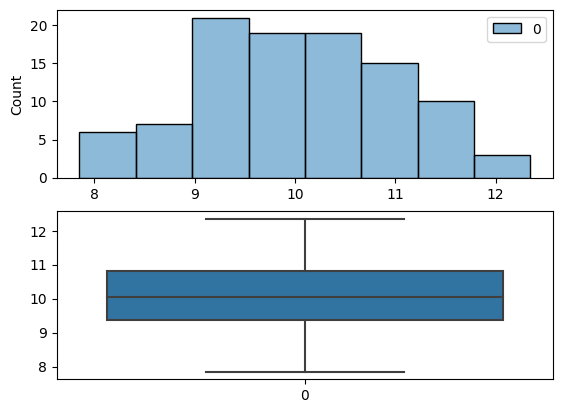

In [3]:
from scipy.stats import norm
from scipy.stats import shapiro
import numpy as np 
import seaborn as sns 

t = np.random.normal(10, 1, 100)

ret = shapiro(t)
print(ret)

df = pd.DataFrame(data=t)

plt.subplot(2,1,1)
sns.histplot(df)
plt.subplot(2,1,2)
sns.boxplot(df)
plt.show()
